In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

Dimenzije EEG podatkov pred čiščenjem: (32, 126073)
Dimenzije EEG podatkov po čiščenju: (32, 117342)
Očiščeni EEG podatki z imeni elektrod so shranjeni v datoteko: filtered_eeg_data.csv


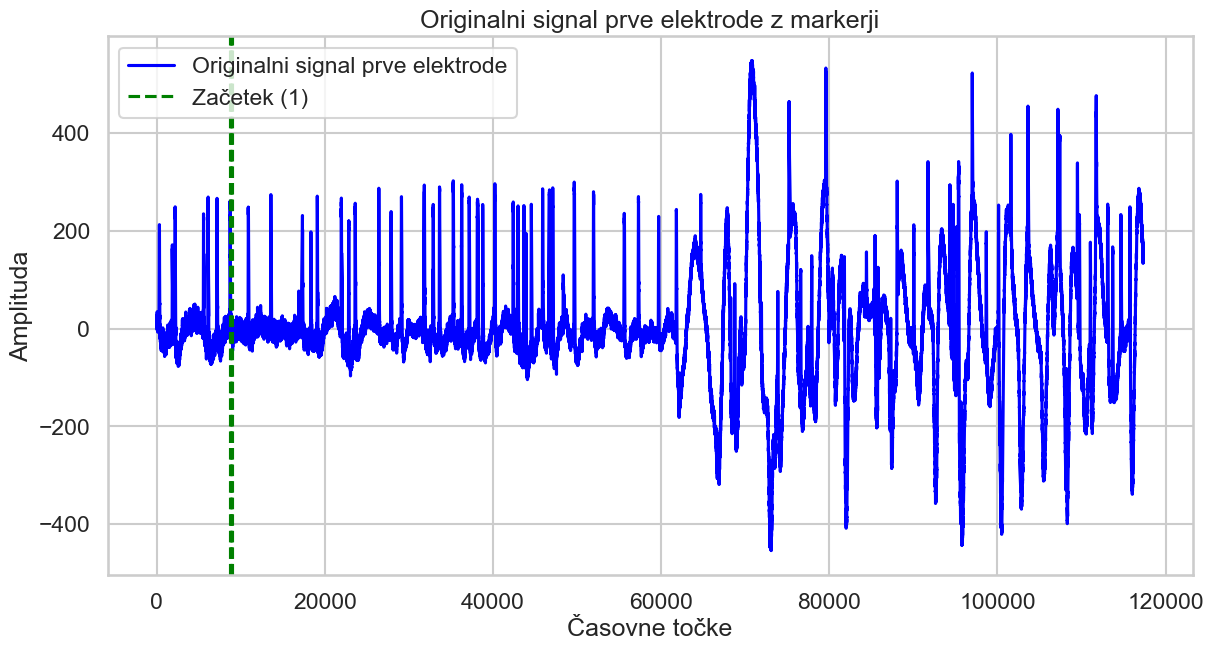

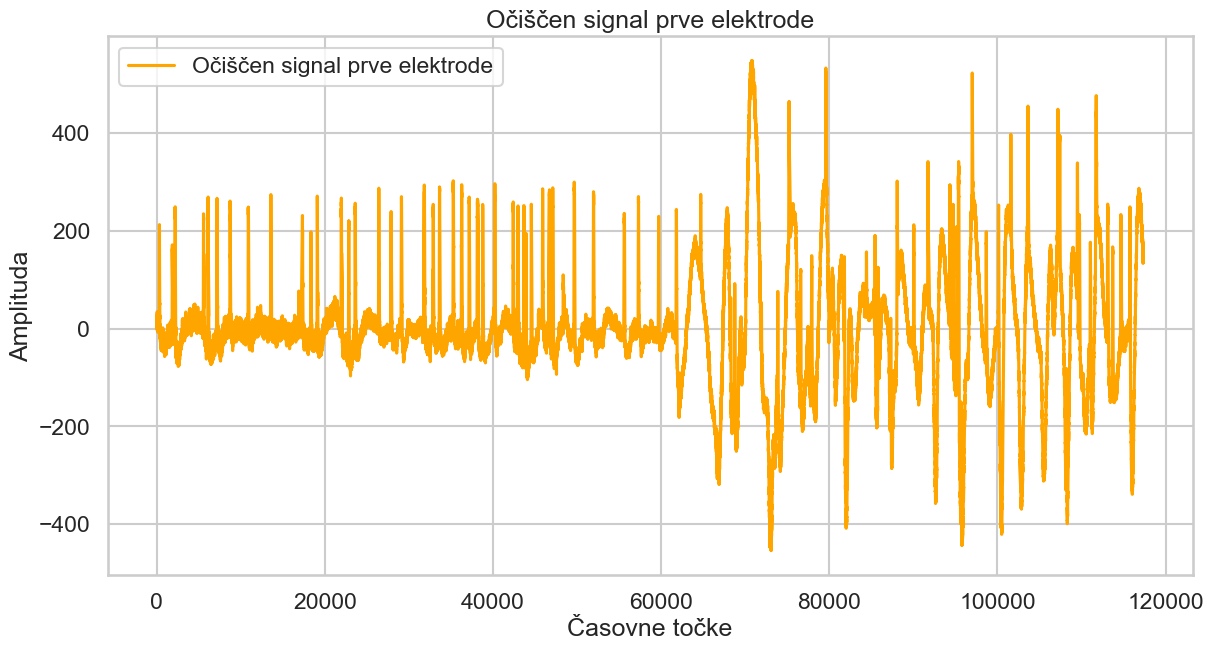

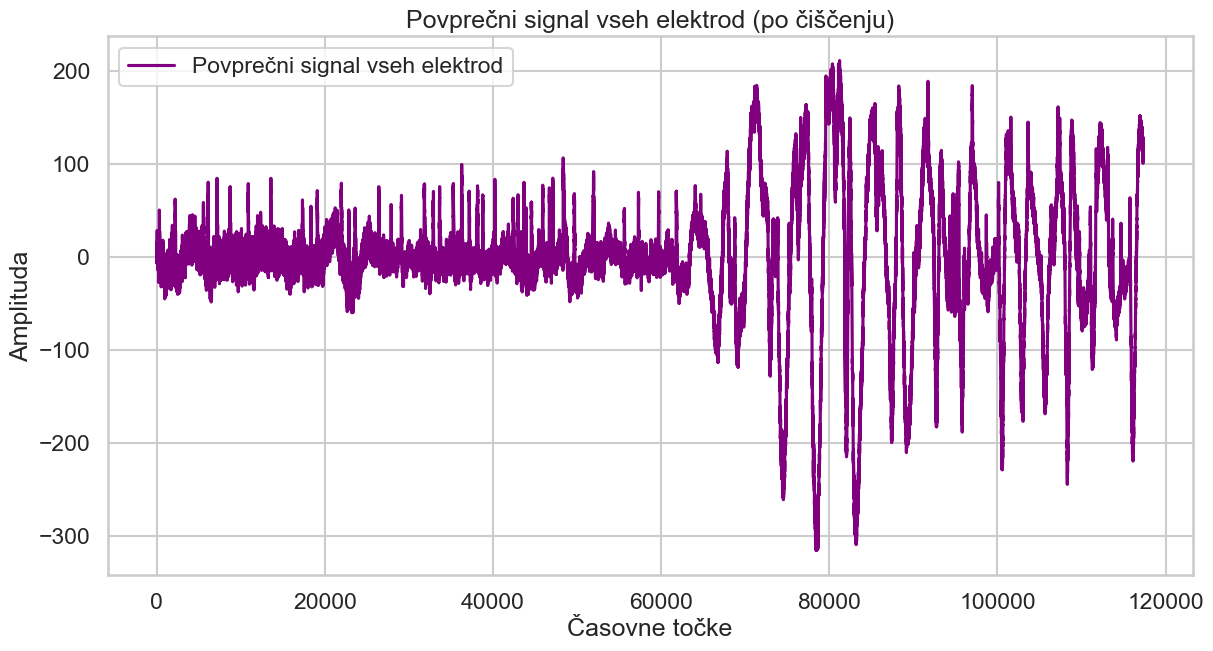

Naloženi EEG podatki iz CSV datoteke:


,0,1,2,3,4,5,6,7,8,9,...,117332,117333,117334,117335,117336,117337,117338,117339,117340,117341
elektroda1,20.901302,14.920018,9.736258,19.848225,20.670055,15.72996,12.541038,17.627283,18.505291,15.793617,...,145.120193,144.658188,149.042572,145.934326,145.222183,143.268311,153.22879,145.944412,135.054565,140.47319


In [3]:
def filter_data(eeg_data, markers, fs=500):

    start_idx = np.where(markers == 1)[0][0] if 1 in markers else 0
    end_idx = np.where(markers == 3)[0][0] if 3 in markers else len(markers)

    # Obdrži podatke med začetkom in koncem
    eeg_data = eeg_data[:, start_idx:end_idx]
    markers = markers[start_idx:end_idx]

    # Odstrani ±1 sekundo okoli markerja 2 (če obstaja)
    for i, marker in enumerate(markers):
        if marker == 2:
            start = max(0, i - fs)  # 1 sekundo pred
            end = min(len(markers), i + fs)  # 1 sekundo po
            eeg_data[:, start:end] = 0  # Nastavi na 0 ali NaN

    return eeg_data


# Preberi .mat datoteko
mat_file = "Janez_Bucar.mat"
with h5py.File(mat_file, 'r') as mat_data:
    dataset = np.array(mat_data['Janez_Bucar']).T  # Transponiraj matriko
    markers = dataset[33]  # Markerji (34. vrstica)
    eeg_data = dataset[34:66]  # EEG podatki (vrstice 35–66)

# Preveri dimenzije EEG podatkov
print("Dimenzije EEG podatkov pred čiščenjem:", eeg_data.shape)

# Očisti EEG podatke
filtered_eeg_data = filter_data(eeg_data, markers)

# Preveri dimenzije očiščenih podatkov
print("Dimenzije EEG podatkov po čiščenju:", filtered_eeg_data.shape)

# Shrani očiščene EEG podatke v CSV z dodanimi imeni stolpcev
output_csv = "filtered_eeg_data.csv"

# Ustvari DataFrame in dodaj imena vrstic
electrode_labels = [f"elektroda{i+1}" for i in range(filtered_eeg_data.shape[0])]
df = pd.DataFrame(filtered_eeg_data, index=electrode_labels)

# Shranjevanje CSV datoteke z imeni vrstic
df.to_csv(output_csv)
print(f"Očiščeni EEG podatki z imeni elektrod so shranjeni v datoteko: {output_csv}")

# Nastavi Seaborn stil
sns.set(style="whitegrid", context="talk")

# Vizualizacija originalnega signala prve elektrode
plt.figure(figsize=(14, 7))
sns.lineplot(data=df.iloc[0], label="Originalni signal prve elektrode", color="blue")
for i, marker in enumerate(markers):
    if marker == 1:  # Začetek eksperimenta
        plt.axvline(x=i, color='green', linestyle='--', label="Začetek (1)" if 'Začetek (1)' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif marker == 2:  # Šum
        plt.axvline(x=i, color='red', linestyle='--', label="Šum (2)" if 'Šum (2)' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif marker == 3:  # Konec eksperimenta
        plt.axvline(x=i, color='blue', linestyle='--', label="Konec (3)" if 'Konec (3)' not in plt.gca().get_legend_handles_labels()[1] else "")
plt.title("Originalni signal prve elektrode z markerji")
plt.xlabel("Časovne točke")
plt.ylabel("Amplituda")
plt.legend()
plt.show()

# Vizualizacija očiščenega signala prve elektrode
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_eeg_data[0], label="Očiščen signal prve elektrode", color="orange")
plt.title("Očiščen signal prve elektrode")
plt.xlabel("Časovne točke")
plt.ylabel("Amplituda")
plt.legend()
plt.show()

# Povprečni signal vseh elektrod (po čiščenju)
avg_signal = np.mean(filtered_eeg_data, axis=0)
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_signal, label="Povprečni signal vseh elektrod", color="purple")
plt.title("Povprečni signal vseh elektrod (po čiščenju)")
plt.xlabel("Časovne točke")
plt.ylabel("Amplituda")
plt.legend()
plt.show()

# Nalaganje podatkov iz CSV datoteke
loaded_df = pd.read_csv(output_csv, index_col=0)
print("Naloženi EEG podatki iz CSV datoteke:")
loaded_df.head(1)


ANALIZA PODATKOV IZ MAP REDUCE

In [46]:
data = pd.read_csv("part-r-00000-norm.csv")
data['ElectrodeNumber'] = data['Elektroda'].str.extract(r'(\d+)$').astype(int)
data = data.sort_values(by='ElectrodeNumber', ascending=True)
data = data.drop(columns=['ElectrodeNumber'], inplace=False).set_index('Elektroda')
data = data.apply(pd.to_numeric, errors='coerce')
data


,Delta,Theta,Alpha,Beta,Gamma
Elektroda,,,,,
elektroda1,0.68,0.19,0.07,0.03,0.02
elektroda2,0.70,0.18,0.07,0.03,0.02
elektroda3,0.69,0.17,0.08,0.04,0.02
elektroda4,0.69,0.17,0.08,0.04,0.02
elektroda5,0.67,0.18,0.09,0.04,0.02
elektroda6,0.65,0.17,0.09,0.06,0.03
elektroda7,0.66,0.19,0.09,0.04,0.02
elektroda8,0.62,0.18,0.11,0.06,0.04
elektroda9,0.63,0.20,0.10,0.05,0.03


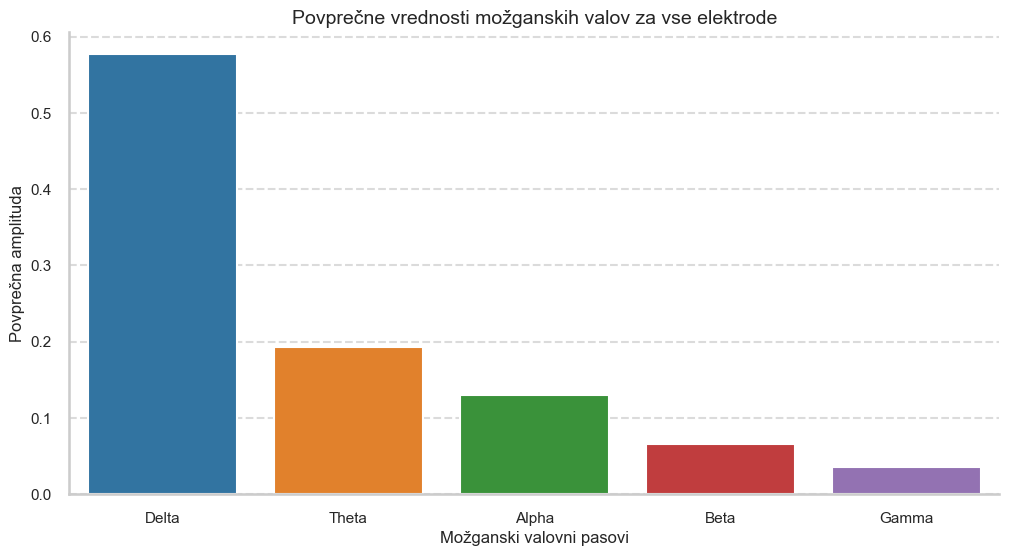

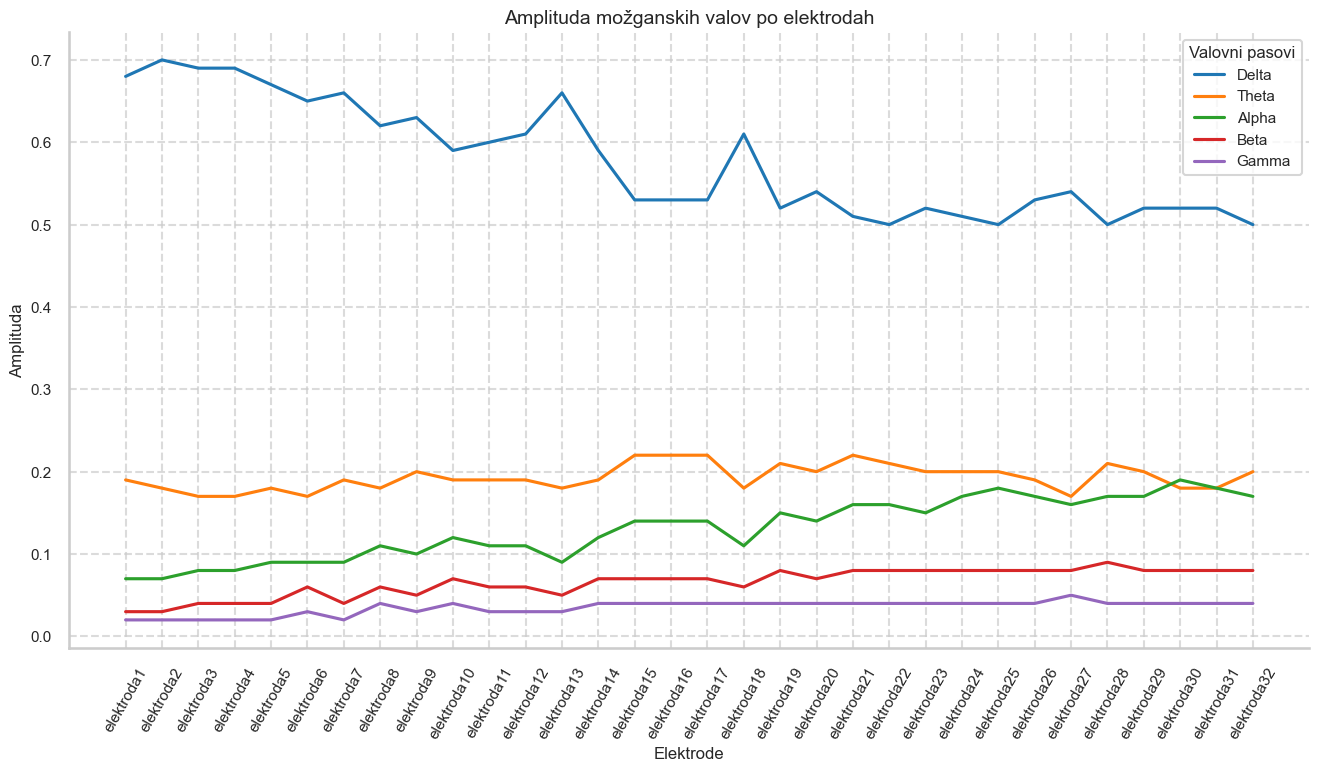

In [47]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Barve za Delta, Theta, Alpha, Beta, Gamma

# Povprečje za vsak možganski valovni pas
average_values = data.mean(axis=0)

# Preoblikovanje podatkov za uporabo `hue`
average_values_df = pd.DataFrame({
    "Band": average_values.index,
    "Amplitude": average_values.values
})

# Vizualizacija povprečnih amplitud za vse pasove
plt.figure(figsize=(12, 6))
sns.barplot(data=average_values_df, x="Band", y="Amplitude", hue="Band", palette=colors, dodge=False)
plt.title("Povprečne vrednosti možganskih valov za vse elektrode", fontsize=14)
plt.xlabel("Možganski valovni pasovi", fontsize=12)
plt.ylabel("Povprečna amplituda", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.legend([], [], frameon=False)  # Odstranimo legendo, ker `hue` že razloži kategorije
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Vizualizacija podatkov za posamezne elektrode
plt.figure(figsize=(16, 8))

for band, color in zip(data.columns, colors):
    sns.lineplot(x=data.index, y=data[band], label=band, color=color)

plt.title("Amplituda možganskih valov po elektrodah", fontsize=14)
plt.xlabel("Elektrode", fontsize=12)
plt.ylabel("Amplituda", fontsize=12)
plt.xticks(rotation=60, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Valovni pasovi", fontsize=11, title_fontsize=12, loc="upper right")
sns.despine()
plt.grid(linestyle="--", alpha=0.7)
plt.show()


ANALIZA REGIONALNIH RAZLIK

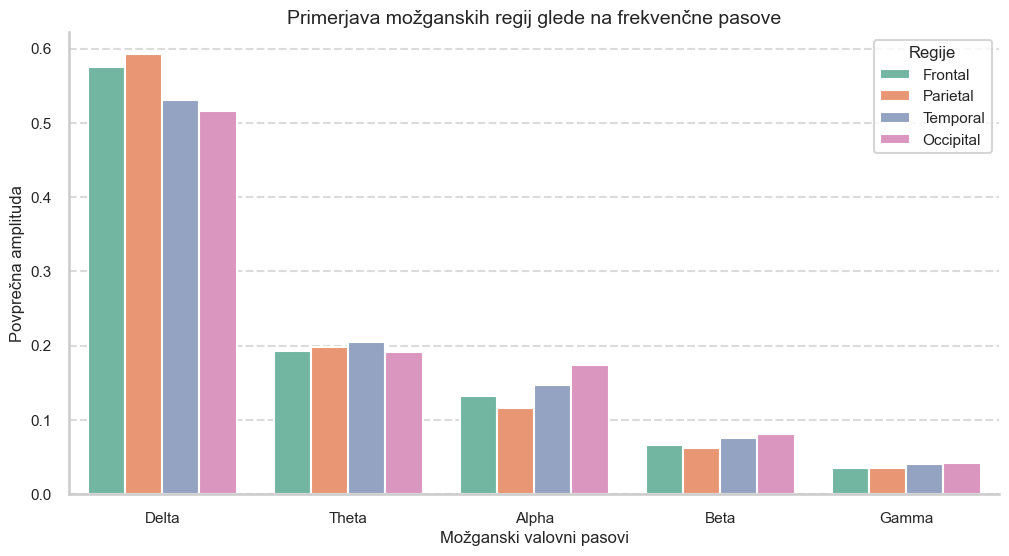

In [50]:
# Frontalna regija (elektrode 1-8)
frontal = data.loc[data.index.str.contains(r'elektroda1|elektroda2|elektroda3|elektroda4|elektroda5|elektroda6|elektroda7|elektroda8')]

# Parietalna regija (elektrode 9-16)
parietal = data.loc[data.index.str.contains(r'elektroda9|elektroda10|elektroda11|elektroda12|elektroda13|elektroda14|elektroda15|elektroda16')]

# Temporalna regija (elektrode 17-24)
temporal = data.loc[data.index.str.contains(r'elektroda17|elektroda18|elektroda19|elektroda20|elektroda21|elektroda22|elektroda23|elektroda24')]

# Okcipitalna regija (elektrode 25-32)
occipital = data.loc[data.index.str.contains(r'elektroda25|elektroda26|elektroda27|elektroda28|elektroda29|elektroda30|elektroda31|elektroda32')]

# Barve za valovne pasove
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Delta, Theta, Alpha, Beta, Gamma

# Povprečje za vsako regijo
regions = {
    "Frontal": frontal.mean(),
    "Parietal": parietal.mean(),
    "Temporal": temporal.mean(),
    "Occipital": occipital.mean()
}

# Pretvorimo v DataFrame za vizualizacijo
regions_df = pd.DataFrame(regions).reset_index()  # Dodamo 'index' kot stolpec za valovne pasove
regions_df = regions_df.rename(columns={"index": "Band"})  # Preimenujemo 'index' v 'Band'

# Preoblikujemo podatke za Seaborn (long format)
regions_long = pd.melt(regions_df, id_vars="Band", var_name="Region", value_name="Amplitude")

# Vizualizacija z uporabo Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=regions_long, x="Band", y="Amplitude", hue="Region", palette="Set2")
plt.title("Primerjava možganskih regij glede na frekvenčne pasove", fontsize=14)
plt.xlabel("Možganski valovni pasovi", fontsize=12)
plt.ylabel("Povprečna amplituda", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Regije", fontsize=11, title_fontsize=12)
plt.show()


KORELACIJA MED FREKFENČNIMI PASOVI

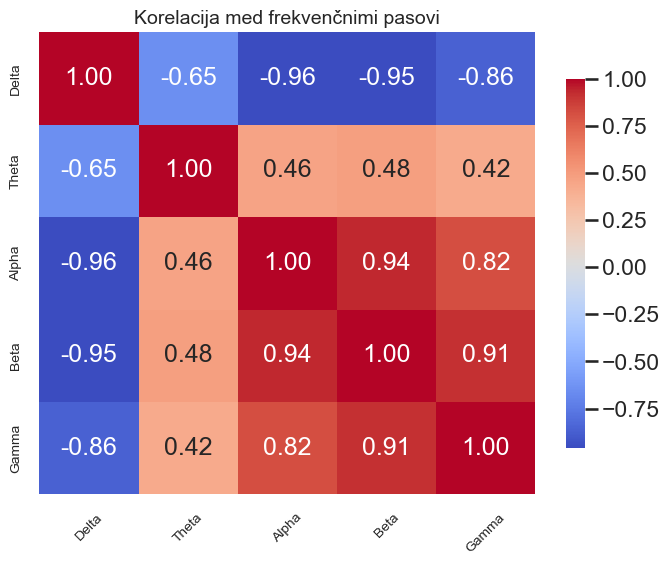

In [51]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title("Korelacija med frekvenčnimi pasovi", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [52]:
from scipy.stats import f_oneway

anova_results = f_oneway(data['Delta'], data['Theta'], data['Alpha'], data['Beta'], data['Gamma'])
print(f"F-statistika: {anova_results.statistic}, P-vrednost: {anova_results.pvalue}")


F-statistika: 1149.1259741236663, P-vrednost: 4.7528036456203004e-114


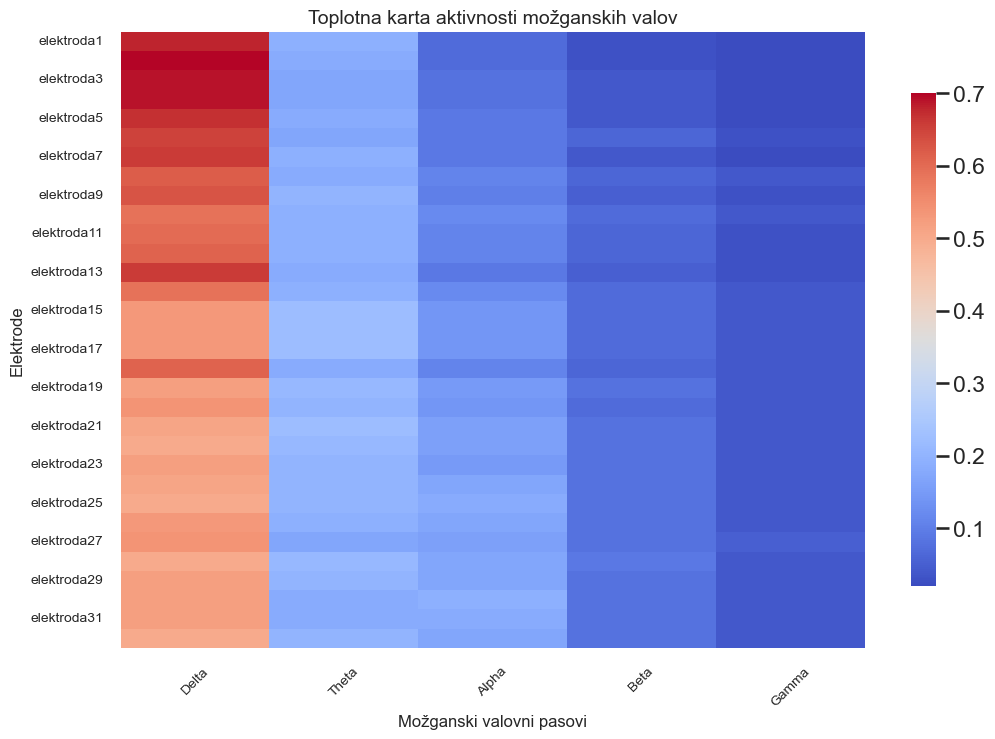

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(data, cmap="coolwarm", annot=False, cbar_kws={"shrink": 0.8})
plt.title("Toplotna karta aktivnosti možganskih valov", fontsize=14)
plt.xlabel("Možganski valovni pasovi", fontsize=12)
plt.ylabel("Elektrode", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()
